In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


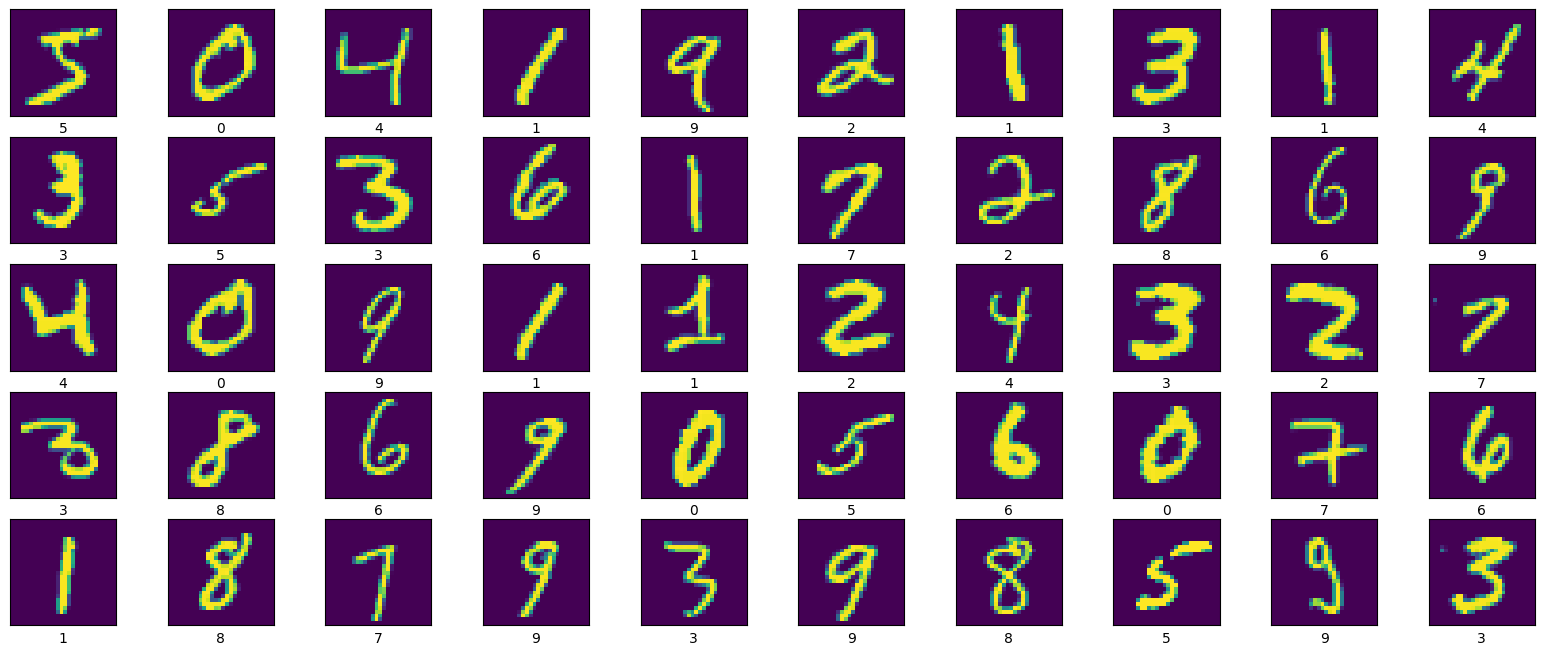

In [15]:
plt.figure(figsize=(20,8))
for i in range(50):
  plt.subplot(5,10,i+1)
  plt.imshow(x_train[i])
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(y_train[i])
plt.show()

In [4]:
x_train,x_test=x_train/255.0,x_test/255.0

In [5]:
model=keras.Sequential([
    keras.Input(shape=(28,28,1)),
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'),
    layers.MaxPool2D(pool_size=(2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),
    layers.MaxPool2D(pool_size=(2,2)),

    layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'),
    layers.MaxPool2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(10,activation='softmax')
])


In [12]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [17]:
history=model.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9989 - loss: 0.0051 - val_accuracy: 0.9954 - val_loss: 0.0429
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9992 - loss: 0.0040 - val_accuracy: 0.9949 - val_loss: 0.0460
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9997 - loss: 0.0015 - val_accuracy: 0.9947 - val_loss: 0.0631
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9985 - loss: 0.0119 - val_accuracy: 0.9961 - val_loss: 0.0417
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9995 - loss: 0.0029 - val_accuracy: 0.9957 - val_loss: 0.0497
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9992 - loss: 0.0038 - val_accuracy: 0.9942 - val_loss: 0.0632
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9992 - loss: 0.0056 - val_accuracy: 0.9958 - val_loss: 0.0400
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9992 - loss: 0.003

In [24]:
predictions=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [19]:
predictions[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [20]:
np.argmax(predictions[0])

np.int64(7)

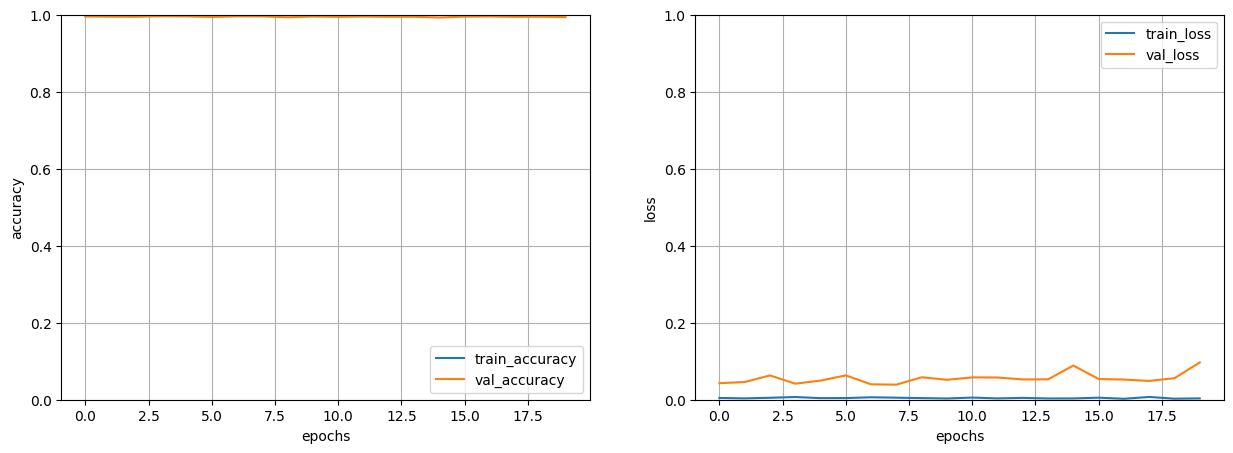

In [22]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='train_accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0,1)
plt.legend(loc='lower right')
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.ylim(0,1)
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

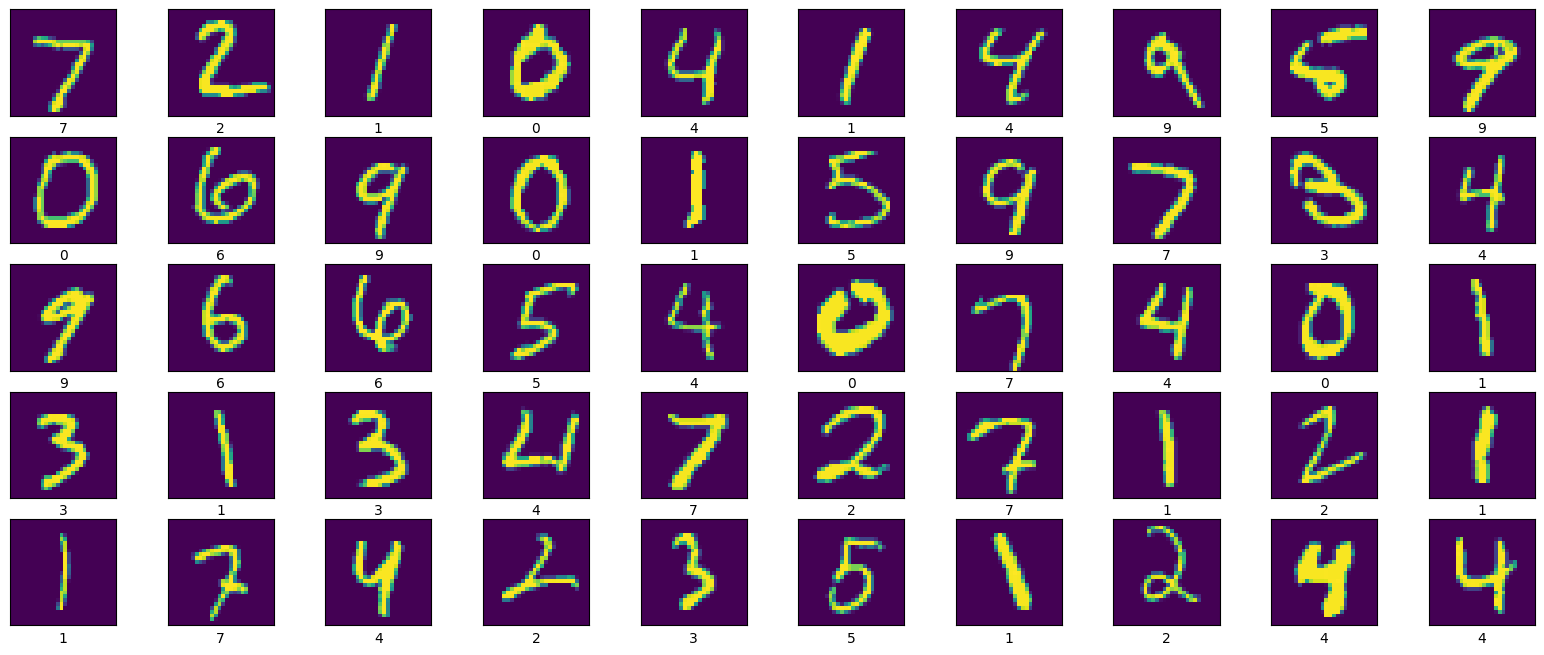

In [25]:
plt.figure(figsize=(20,8))
for i in range(50):
  plt.subplot(5,10,i+1)
  plt.imshow(x_test[i])
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(np.argmax(predictions[i]))